# Homework #1 - Basic Statistics

**In this assignment, you are going to solve some basic statistical problems like estimating parameters of a distribution. In each problem, you are instructed to write little chunks of Python code. Additionally, there are few questions that you have to answer based on your observations and your knowledge of statistics.**

**Ultimately, you are expected to submit your solutions as a single jupyter notebook, *not a python script or anything else.***

**In the case of any questions, post it on the Q&A forum.**

Good Luck

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from dists import *

# Problem #1 - Parameter Estimation

**A) By calling `my_dist(n_sample, student_id)`, draw a sample of size 100 from the my_dist distribution.**

In [2]:
sample_size = 100
student_id = 810199340
my_dist_sample = my_dist(sample_size, student_id)

**B) Calculate and print the mean of the sample you've just drawn.**

In [3]:
my_dist_sample_mean = my_dist_sample.mean()
print("My dist sample mean: {}".format(my_dist_sample_mean))

My dist sample mean: 2.0534965110418035


**C) Calculate the *unbiased estimation* of the standard deviation of your sample.**

In [4]:
my_dist_sample_unbiased_std = my_dist_sample.std(ddof=1)
print("My dist sample unbiased std: {}".format(my_dist_sample_unbiased_std))

My dist sample unbiased std: 7.986653684094258


**D) Answer the following questions.**
- What is an unbiased estimator?

When we calculating population parameters from sample parameters, we should consider accuracy.
In estimating population variance by sample variance, divide deviations to N makes underestimate and beacause of that it calls biased estimator.
For correcting this issue, we divide by n - 1 instead of by n. This is called Bessel's correction.It calls unbiased estimation to correct population patameter underestimation.
If we're trying to estimate the standard deviation of the population using a sample of data, we do so. we devide by n-1 instead of n. It called unbiased estimation of standard deviation.

$$ s = \sqrt {{\Sigma (x_i - \mu_x)^2}\over {N-1}}$$

- In what situations the maximum likelihood estimation of the variance of a distribution can severely contaminate the estimation?

When we have small sample size, maximum likelihood estimation of the variance can be really low. In this situation, Bessel's correction can be very useful because changing denominator from N to N-1 helps this underestimation gets correct. This change is very significant.


**E) Now, draw 2000 samples of size 500 and store their means in an array You're going to use this array in the next questions. Your result, obviously, is a vector of 2000 numbers.**

In [5]:
sample_size = 500
samples = [my_dist(sample_size, student_id) for _ in range(2000)]
sample_means = [sample.mean() for sample in samples]

# Problem #2 - Data Visualization and CLT

**A) Draw a sample of size 2000 from my_dist distribution. Then, using matplotlib package, depict the boxplot of your sample.**

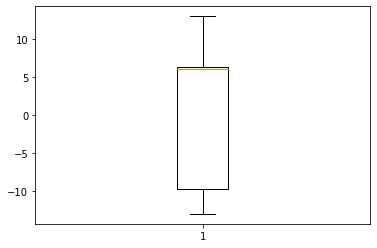

In [6]:
sample_size = 2000
my_dist_sample_2 = my_dist(sample_size, student_id)
sample_boxplot = plt.boxplot(my_dist_sample_2)

**B) Now, plot the histogram of the sample means you've calculated in problem 1 part E.**

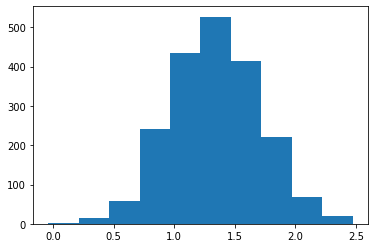

In [7]:
sample_means_histogram = plt.hist(sample_means)

**C) Considering the 2000 realizations of the sample means distribution you've calculated in problem 1 part E, compute their mean and standard deviation.**

In [8]:
def print_mean_and_std_of_means(sample_means):
    sample_means_np = np.array(sample_means)
    sample_means_mean = sample_means_np.mean()
    sample_means_std = sample_means_np.std()
    print("Sample means distribution mean: {}".format(sample_means_mean))
    print("Sample means distribution std: {}".format(sample_means_std))
    
print_mean_and_std_of_means(sample_means)

Sample means distribution mean: 1.3374662105159922
Sample means distribution std: 0.36688823745125954


**D) Now, draw another 2000 samples of size 10 from my_dist and store their means in another array. Then, compute the mean and standard deviation of these 2000 samples.**

In [9]:
sample_size = 10
samples_2 = [my_dist(sample_size, student_id) for _ in range(2000)]
sample_means_2 = [sample.mean() for sample in samples_2]
print_mean_and_std_of_means(sample_means_2)

Sample means distribution mean: 1.310562914978656
Sample means distribution std: 2.5904206011026663


**E) Answer the following questions.**
- What do you think is the main characteristic of the histogram in part B?

I think this histogram is like normal distribution. It has bell curve shape and it's symmetrical.

- Interpret the results of part C. Do these results have any association with your estimation of the mean of my_dist distribution? Explain.

Yes. We try to estimate distribution mean by drawing multiple samples with good size from distribution and calculate mean from this samples. Get mean and std of this sample means can lead us to distribution mean because we try to increase our accuracy by drawing multiple times.
As you see in part C, it has low standard deviation that say all means are focused in one point(means of mean). In other word, many mean values are close to means of mean. This value can be good estimator of my_dist distribution mean.

- Are there any considerable difference between the results of part C and D? Why?

Yes. Distributions mean are close to each other but part D have a higher std because sample size is much smaller than part c. This smaller sample size cause values for mean that are far from mean. Because of that part D has higher standard deviation.

# Problem #3 - Confidence Interval

**A) Construct a 95% confidence interval on the sample means of my_dist distribution. Your result, obviously, consists of two numbers: a lower bound and an upper bound of the calculated interval.**

In [28]:
sample_means_np = np.array(sample_means)
sample_means_mean = sample_means_np.mean()
sample_means_std = sample_means_np.std()
sample_means_ci = st.norm.interval(alpha=0.95, loc=sample_means_mean, scale=sample_means_std)
print(sample_means_ci)

(0.6183784787601441, 2.05655394227184)


**B) What does this interval mean?**

We are 95% confident that mean of my_dist distribution with given seed(student_id) on average is in (0.6183784787601441, 2.05655394227184) interval.

# Problem #4 - Estimating The Parameters of Some Observations

**In this problem, you're going to estimate the average of a random variable. In contrast with previous problems, this time the observations are collected one by one. To observe a single realization of this random variable, call `my_dist2(student_id)` function. Upon calling this function, a single observation/realization of this random variable is returned.**

**A) Draw 100 samples from my_dist2 distribution. After observing each realization, calculate the sample mean of the realizations you've observed so far. In addition to that, construct a confidence interval for your estimation at 0.1 significane level. Finally, plot your estimations in a bar plot alongside their confidence errors as whisckers of each bar. Your final plot should look similar to this:**

<img src="https://support.content.office.net/en-us/media/68efe29e-f30c-4c6f-95cf-9cff7dde1131.jpg" width="400px" alt="no internet connection!">

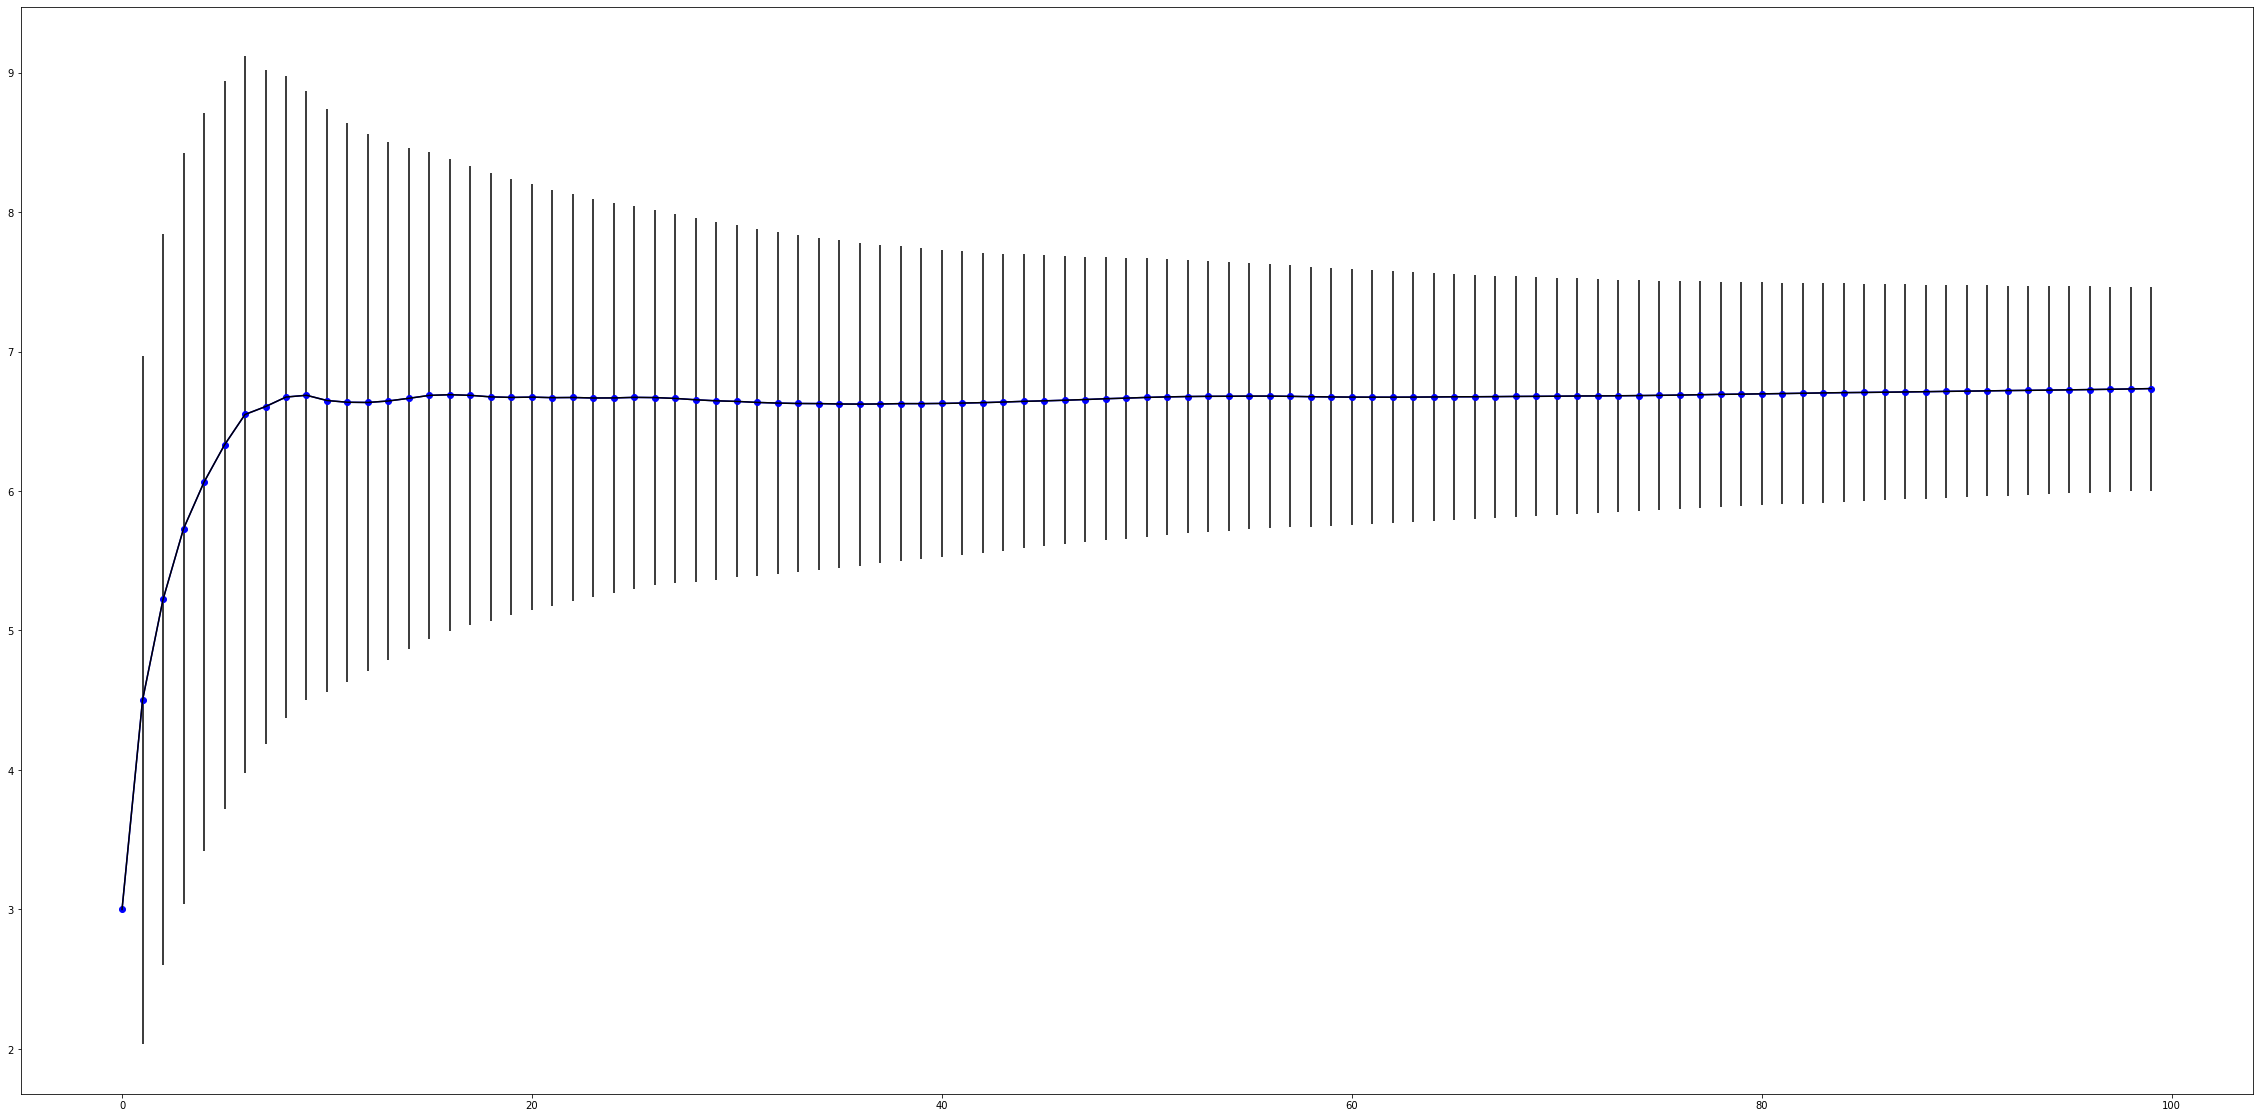

In [51]:
samples_2 = []
samples_2_means = []
estimations = []
confidence_intervals = []
for _ in range(100):
    new_observation = my_dist2(student_id)
    samples_2.append(new_observation)
    sample_mean = np.mean(samples_2)
    samples_2_means.append(sample_mean)
    mean_estimation = np.mean(samples_2_means)
    means_estimation_ci = st.norm.interval(alpha=0.90, loc=np.mean(samples_2_means), scale=np.std(samples_2_means))
    estimations.append(mean_estimation)
    confidence_intervals.append(means_estimation_ci)
x = range(100)
ci_upperbounds = [bounds[1] for bounds in confidence_intervals]
deviations = [a_i - b_i for a_i, b_i in zip(ci_upperbounds, estimations)] 
plt.figure(figsize=(40,20))
plt.plot(x, estimations, '-o', color = 'blue')
plt.errorbar(x, estimations, yerr=deviations, color = 'black')
plt.show()

**B) How is your estimation changing over time? How is your confidence interval changing? Explain why.**

At first it starts with rises and falls but at the end, it converges to a value that is a good estimator for distribution mean. Reason is when we have more draws, single draw can't effect the whole mean a lot and means shape estimation to real value mean.

As you see in the plot, confidence interval gets smaller because standard deviation gets smaller. It happens because when draws count goes bigger, means are more likely to be around the mean and be compact. Because of that standard deviation gets smaller, hence, confidence interval gets shorter.